In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
import tensorflow_text

In [3]:
import os
import re
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
df = pd.read_pickle("../data/preprocess_train.pkl")
df.head()

,id,keyword,location,text,target,text_clean,text_token,text_final,pos_tags,wordnet_tag,lemmatize,text_lemma,char_count1,char_count2,word_count1,word_count2,mword_leng1,mword_leng2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u,68,42,13,7,4.307692,5.142857
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (...","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,37,37,7,7,4.428571,4.428571
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl...","[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...,130,79,22,11,4.954545,6.272727
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...,63,57,8,7,6.875000,7.285714
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (...","[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...,86,54,16,9,4.375000,5.111111


In [5]:
df["text_clean_final"] = [' '.join(map(str, x)) for x in df["text_final"]]

In [6]:
df.head()

,id,keyword,location,text,target,text_clean,text_token,text_final,pos_tags,wordnet_tag,lemmatize,text_lemma,char_count1,char_count2,word_count1,word_count2,mword_leng1,mword_leng2,text_clean_final
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u,68,42,13,7,4.307692,5.142857,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (...","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,37,37,7,7,4.428571,4.428571,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl...","[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...,130,79,22,11,4.954545,6.272727,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...,63,57,8,7,6.875000,7.285714,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (...","[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...,86,54,16,9,4.375000,5.111111,got sent photo ruby alaska smoke wildfires pou...


In [7]:
from sklearn.model_selection import train_test_split
RSEED = 42

X_train, X_test, y_train, y_test = train_test_split(df['text_clean_final'], df['target'], test_size=0.2, random_state=RSEED)

In [8]:
X_train_new = np.array(X_train, dtype=object)[:, np.newaxis]
print(X_train_new)
X_test_new = np.array(X_test, dtype=object)[:, np.newaxis]

[['courageous honest analysis need use atomic bomb 1945 hiroshima70 japanese military refused surrender']
 ['zachzaidman 670thescore wld b shame golf cart became engulfed flames boycottbears']
 ['tell barackobama rescind medals honor given us soldiers massacre wounded knee sign rt']
 ...
 ['omron hem712c automatic blood pressure monitor standard large bp cuffs']
 ['officials say quarantine place alabama home possible ebola case developing symptoms']
 ['moved england five years ago today whirlwind time']]


In [9]:
y_train_new = np.array(y_train)
y_test_new = np.array(y_test)
print(y_train_new[:5])
print(y_train_new.shape)

[1 0 1 1 0]
(6090,)


In [10]:
# Function to build overall model
def build_model():
    # tf hub bert model path
    bert_path = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4" 

    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
    
    
    preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
    encoder_inputs = preprocessor(text_input)
    encoder = hub.KerasLayer(bert_path,trainable=False)
    outputs = encoder(encoder_inputs)
    pooled_output = outputs["pooled_output"]      # [batch_size, 768].
    sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].# just extract BERT features
    
    # train dense classification layer on top of extracted pooled output features
    dense = tf.keras.layers.Dense(256, activation="relu")(pooled_output)
    pred = tf.keras.layers.Dense(1, activation="sigmoid")(dense)

    model = tf.keras.Model(inputs=text_input, outputs=pred)
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()

    return model

In [11]:
with tf.device('/cpu:0'):
   model = build_model()
   history = model.fit(X_train_new,y_train_new,validation_data=(X_test_new,y_test_new),epochs=5,batch_size=32)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-07-25 15:02:17.923395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-25 15:02:17.923540: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-25 15:02:21.455823: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['input_1[0][0]']                
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

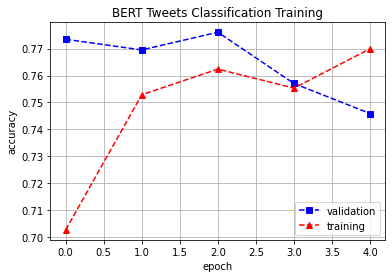

In [13]:
import matplotlib.pyplot as plt

df_history = pd.DataFrame(history.history)
fig,ax = plt.subplots()
plt.plot(range(df_history.shape[0]),df_history['val_accuracy'],'bs--',label='validation')
plt.plot(range(df_history.shape[0]),df_history['accuracy'],'r^--',label='training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('BERT Tweets Classification Training')
plt.legend(loc='best')
plt.grid()
plt.show()

fig.savefig('../images/BERTConvergence.png', format='png')


In [14]:
model.save('../models/tweet_bert_model')

2022-07-25 17:28:39.634380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../models/tweet_bert_model/assets


INFO:tensorflow:Assets written to: ../models/tweet_bert_model/assets
